In [3]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def fit(self, X, y):
        self.weights = np.random.rand(X.shape[1])
        self.bias = np.random.rand(1)

        for _ in range(self.epochs):
            for inputs, target in zip(X, y):
                prediction = self.predict(inputs)
                error = target - prediction
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error
    def predict(self, inputs):
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return self._activation(weighted_sum)
    def _activation(self, z):
        return 1 if z >= 0 else 0

In [44]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Access the features and target variables
X = iris.data[:,:2]
y = np.where(iris.target!=0, 0, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print(X_train.shape,X_test.shape,y_train.shape)


(120, 2) (30, 2) (120,)


In [36]:
# Create a perceptron with two input features
perceptron = Perceptron(learning_rate=0.1, epochs=10)

# Train the perceptron on the training data
perceptron.fit(X_train, y_train)

# Get predictions from the test set
y_pred = np.array([perceptron.predict(x) for x in X_test])

# Generate the classification report
report=classification_report(y_pred,y_test, target_names=['f','g'])

print(report)

              precision    recall  f1-score   support

           f       1.00      1.00      1.00        19
           g       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## As we will see in the diagram below, Perceptron is only helpful for linearly classified classes

    sepal length (cm)  sepal width (cm)  Prdiction
0                 5.8               2.8          0
1                 6.0               2.2          0
2                 5.5               4.2          1
3                 7.3               2.9          0
4                 5.0               3.4          1
5                 6.3               3.3          0
6                 5.0               3.5          1
7                 6.7               3.1          0
8                 6.8               2.8          0
9                 6.1               2.8          0
10                6.1               2.6          0
11                6.4               3.2          0
12                6.1               2.8          0
13                6.5               2.8          0
14                6.1               2.9          0
15                4.9               3.6          1
16                6.0               2.9          0
17                5.5               2.6          0
18                4.8          

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

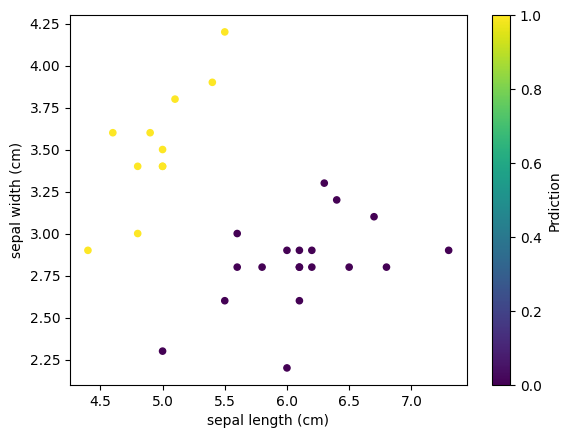

In [45]:
import matplotlib.pyplot as plt
import pandas as pd


df = pd.DataFrame(X_test, columns=iris.feature_names[:2])

df['Prdiction'] = y_pred
print(df)

df.plot.scatter(
    x='sepal length (cm)',
    y='sepal width (cm)',
    c='Prdiction',
    colormap='viridis'
)